In [4]:
%matplotlib inline

import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import theano.tensor as tt

In [5]:
x = np.random.randn(100)

/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


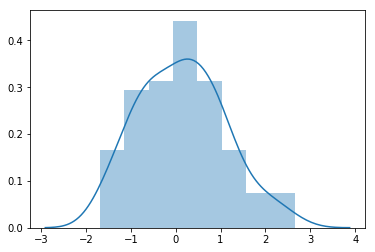

In [7]:
sns.distplot(x)

In [8]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sd=1)
    sd = pm.Normal('sd', mu=0, sd=1)
    
    obs = pm.Normal('obs', mu=mu, sd=sd, observed=x)
    
    step = pm.Metropolis()
    trace = pm.sample(5000, step)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [sd]
>Metropolis: [mu]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:03<00:00, 2879.68draws/s]


/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c27cd4a90>,
      dtype=object)

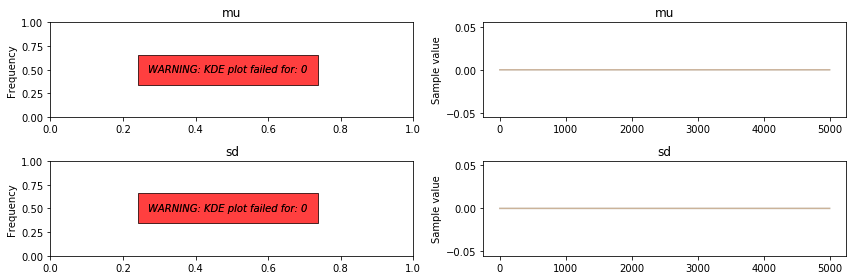

In [9]:
pm.traceplot(trace)

### Debug using Print function

In [11]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sd=1)
    sd = pm.Normal('sd', mu=0, sd=1)
    
    mu_print = tt.printing.Print('mu')(mu)
    sd_print = tt.printing.Print('sd')(sd)
    
    obs = pm.Normal('obs', mu=mu_print, 
                    sd=sd_print, observed=x)
    
    step = pm.Metropolis()
    trace = pm.sample(3, step, tune=0, chains=1, 
                      progressbar=False)

mu __str__ = 0.0
sd __str__ = 0.0


Only 3 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [sd]
>Metropolis: [mu]


sd __str__ = 0.39190687166839766
mu __str__ = 0.0
sd __str__ = 0.0
sd __str__ = 0.0
mu __str__ = -0.27747248228219085
mu __str__ = 0.0
sd __str__ = 0.49974573172548115
mu __str__ = 0.0
sd __str__ = 0.0
sd __str__ = 0.0
mu __str__ = 0.5949286972941096
mu __str__ = 0.0
sd __str__ = -1.505740209222935
mu __str__ = 0.0
sd __str__ = 0.0
sd __str__ = 0.0
mu __str__ = -1.0746512308258556
mu __str__ = 0.0


/anaconda/envs/py36/lib/python3.6/site-packages/pymc3/sampling.py:476: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")


In [16]:
with pm.Model() as model2:
    mu = pm.Normal('mu', mu=0, sd=1)
    sd = pm.HalfNormal('sd', sd=1)
    
    obs = pm.Normal('obs', mu=mu, sd=sd, observed=x)
    
    step = pm.Metropolis()
    trace2 = pm.sample(5000, step, tune=0, chains=1)

Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [sd]
>Metropolis: [mu]
100%|██████████| 5000/5000 [00:01<00:00, 2952.55it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c28ec08d0>,
      dtype=object)

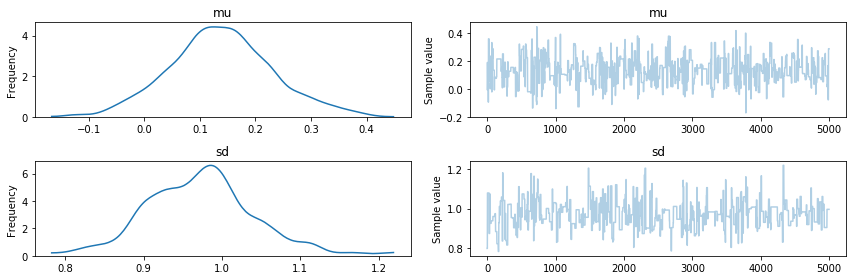

In [17]:
pm.traceplot(trace2)